### Pipeline for a single spikeglx session
- Load an exctractor for visualization of the data
- Sort it using kilosort

In [1]:
%matplotlib inline
import os
import glob
import logging
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload

logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [2]:
from ceciestunepipe.file import filestructure as et
from ceciestunepipe.util import sglxutil as sglu
from ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor import readSGLX as rsgl
from ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor import spikeglxrecordingextractor as sglex

In [3]:
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
logger.info('all modules loaded')

2021-02-20 11:39:33,617 root         INFO     all modules loaded


### Session parameters and raw files

In [4]:
reload(et)

bci_locations_dict = {'mnt': os.path.abspath('/mnt/cube/earneodo/bci_zf/neuropix/birds'),
                             'local': os.path.abspath('/mnt/cube/earneodo/scratch/raw_data'),
                             'fast': os.path.abspath('/mnt/cube/earneodo/scratch')
                             }

bird = 'z_w12m7_20'
all_bird_sess = et.list_sessions(bird, location_dict=bci_locations_dict)
all_bird_sess

['20201105', '20201106', '20201104']

In [5]:
sess_par = {'bird': 'z_w12m7_20',
           'sess': '20201104',
           'probe': 'probe_0', # probe to sort ('probe_0', 'probe_1') (to lookup in the rig_par which port to extract)
           'sort': 2}

exp_struct = et.get_exp_struct(sess_par['bird'], sess_par['sess'], sess_par['sort'],
                              location_dict=bci_locations_dict)

ksort_folder = exp_struct['folders']['ksort']
raw_folder = exp_struct['folders']['raw']

In [6]:
sess_epochs = sglu.list_sgl_epochs(sess_par, location_dict=bci_locations_dict)
sess_epochs

2021-02-20 11:39:33,722 ceciestunepipe.util.sglxutil INFO     {'folders': {'bird': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20', 'raw': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104', 'kwik': '/mnt/cube/earneodo/scratch/raw_data/z_w12m7_20/Ephys/kwik/20201104', 'processed': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/processed/20201104', 'derived': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/derived/20201104', 'tmp': '/mnt/cube/earneodo/scratch/tmp', 'msort': '/mnt/cube/earneodo/scratch/z_w12m7_20/Ephys/msort/20201104', 'ksort': '/mnt/cube/earneodo/scratch/z_w12m7_20/Ephys/ksort/20201104'}, 'files': {'par': '/mnt/cube/earneodo/scratch/z_w12m7_20/Ephys/ksort/20201104/params.json', 'set': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/settings.isf', 'rig': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/rig.json', 'kwd': '/mnt/cube/earneodo/scratch/raw_data/z_w12m7_20/Ephys/k

['20201104_alles',
 '2500r250a_3500_dir_g0',
 '2500r250a_3500_dir_g1',
 '2500r250a_3500_dir_g2']

In [7]:
### pick a session
reload(sglu)
epoch = sess_epochs[1]

exp_struct = sglu.sgl_struct(sess_par, epoch)
sgl_folders, sgl_files = sglu.sgl_file_struct(exp_struct['folders']['raw'])

In [8]:
sgl_folders

{'nidq': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/2500r250a_3500_dir_g0',
 'imec_0': '/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/2500r250a_3500_dir_g0/2500r250a_3500_dir_g0_imec0'}

In [9]:
sgl_files

{'nidq': ['/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/2500r250a_3500_dir_g0/2500r250a_3500_dir_g0_t0.nidq.meta'],
 'lf_0': ['/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/2500r250a_3500_dir_g0/2500r250a_3500_dir_g0_imec0/2500r250a_3500_dir_g0_t0.imec0.lf.meta'],
 'ap_0': ['/mnt/cube/earneodo/bci_zf/neuropix/birds/z_w12m7_20/Ephys/raw/20201104/2500r250a_3500_dir_g0/2500r250a_3500_dir_g0_imec0/2500r250a_3500_dir_g0_t0.imec0.ap.meta']}

### get a rec dict
- Get the experiment specific metadata (probe, rig json)
- Load all the files into a dictionary with locations and recording objects from spikeinterface

In [10]:
probe_id = int(sess_par['probe'].split('_')[-1])
i_run = 0

run_meta_files = {k: v[i_run] for k, v in sgl_files.items()}
run_recordings = {k: sglex.SpikeGLXRecordingExtractor(sglu.get_data_meta_path(v)[0]) for k, v in run_meta_files.items()}

#probe_data_folder = sgl_folder['imec'][probe_id]

### view a couple of example traces

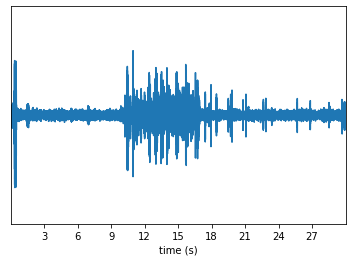

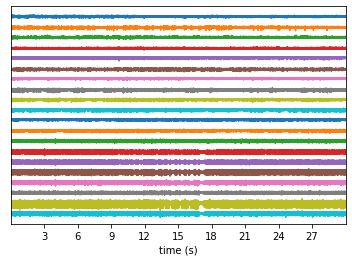

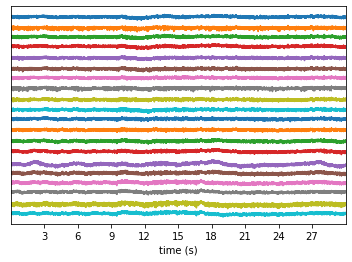

In [11]:
mic_ts = sw.plot_timeseries(run_recordings['nidq'], channel_ids=[0], trange=[0,30])

ap_ts = sw.plot_timeseries(run_recordings['ap_0'], channel_ids=range(40, 60), trange=[0,30])

lf_ts = sw.plot_timeseries(run_recordings['lf_0'], channel_ids=range(40, 60), trange=[0,30])

## The digital and sync channel in the recording
- using the new methods in my version of readSGLX, spikeglxrecordingextractor

2021-02-20 11:39:39,517 ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor INFO     getting ttl events, chan 0


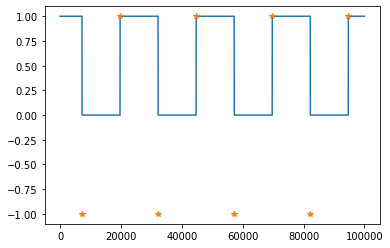

In [12]:
### the digital chan and the syn extraction of the nidq rec

nidq_syn = rsgl.ExtractDigital(run_recordings['nidq']._raw, 0, 100000, 0, [0], run_recordings['nidq']._meta)
nidq_syn_ttl = run_recordings['nidq'].get_ttl_events(channel_id=0, end_frame=100000)

plt.plot(nidq_syn.flatten())
plt.plot(*nidq_syn_ttl, '*')

2021-02-20 11:39:40,652 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Extracting digital on imec stream: there is only one channel, if any (SYN) and will be converted from an int16 channel 
2021-02-20 11:39:40,654 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     allocated array for syn channel of size (100000,)
2021-02-20 11:39:40,656 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Threshold for logical hi is 34.33152
2021-02-20 11:39:40,657 ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor INFO     getting ttl events, chan 0
2021-02-20 11:39:40,657 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Extracting digital on imec stream: there is only one channel, if any (SYN) and will be converted from an int16 channel 
2021-02-20 11:39:40,658 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     allocated array for syn channel of size (100000,)
2021-02-20 11:39:

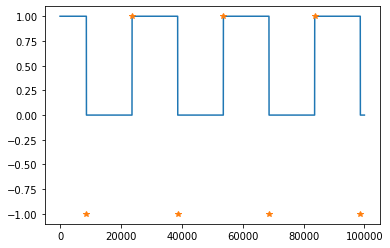

In [13]:
### the digital chan and the syn extraction of the nidq rec
ap_syn = rsgl.ExtractDigital(run_recordings['ap_0']._raw, 0, 100000, 0, [0], run_recordings['ap_0']._meta)
ap_syn_ttl = run_recordings['ap_0'].get_ttl_events(end_frame=100000)

plt.plot(ap_syn.flatten())
plt.plot(*ap_syn_ttl, '*')

### Syncrhonize using the methods of the SpikeGLXRecordingExtractor object

sync all t_prime to the 'ap_0' stream.

Best practice is to use the signal with the highest sampling rate as a 'true' time

In [14]:
run_recordings['nidq'].syn_to_sgl_rec_exctractor(run_recordings['ap_0'], force_ttl=True)

2021-02-20 11:40:10,077 ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor INFO     getting ttl events, chan 0
2021-02-20 11:40:10,078 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Extracting digital on imec stream: there is only one channel, if any (SYN) and will be converted from an int16 channel 
2021-02-20 11:40:10,079 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     allocated array for syn channel of size (229265563,)
2021-02-20 11:45:35,256 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Threshold for logical hi is 32.00288350326734
2021-02-20 11:45:45,500 ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor INFO     getting ttl events, chan 0


In [15]:
run_recordings['lf_0'].syn_to_sgl_rec_exctractor(run_recordings['ap_0'], force_ttl=True)
#run_recordings['nidq'].syn_to_sgl_rec_exctractor(run_recordings['ap_0'], force_ttl=True)
run_recordings['ap_0'].syn_to_sgl_rec_exctractor(run_recordings['ap_0'], force_ttl=True)

2021-02-20 11:46:18,526 ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor INFO     getting ttl events, chan 0
2021-02-20 11:46:18,527 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Extracting digital on imec stream: there is only one channel, if any (SYN) and will be converted from an int16 channel 
2021-02-20 11:46:18,528 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     allocated array for syn channel of size (229265563,)
2021-02-20 11:46:21,540 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Threshold for logical hi is 32.00288350326734
2021-02-20 11:46:25,918 ceciestunepipe.util.spikeextractors.extractors.spikeglxrecordingextractor.spikeglxrecordingextractor INFO     getting ttl events, chan 0
2021-02-20 11:46:25,920 ceciestunepipe.util.spikeextractors.extractors.readSGLX INFO     Extracting digital on imec stream: there is only one channel, if any (SYN) and will be converted from a

### Test the sync

### Plot all times togeteher
should see different slopes, same end y point

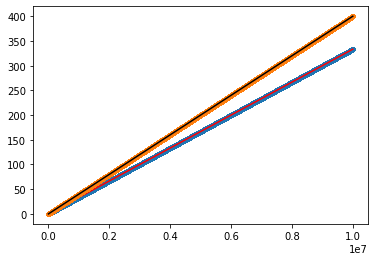

In [31]:
max_t_idx = int(1e7)
plt.plot(run_recordings['ap_0']._t_0[:max_t_idx], '.')
plt.plot(run_recordings['ap_0']._t_prime[:max_t_idx], 'r')
plt.plot(run_recordings['nidq']._t_0[:max_t_idx], '.')
plt.plot(run_recordings['nidq']._t_prime[:max_t_idx], 'k')
#plt.plot(run_recordings['lf_0']._t_prime[:max_t_idx], 'g')

In [33]:
np.max(run_recordings['ap_0']._t_prime)

7642.183232997818

### plot the square syn signals in the three different timescales
(see a segment at the end, to check that the drift is low/nonexistent)

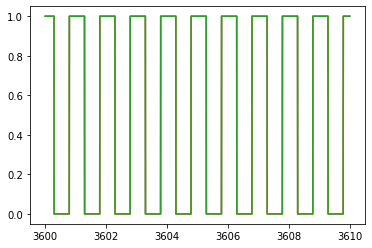

In [45]:
t_plot = {}

sig = 'lf_0'
t_start_plot = 3600
t_end_plot = t_start_plot + 10

t_plot[sig] = (run_recordings[sig]._t_prime > t_start_plot) & (run_recordings[sig]._t_prime < t_end_plot)
plt.plot(run_recordings[sig]._t_prime[t_plot[sig]], run_recordings[sig]._dig[t_plot[sig]])

sig = 'ap_0'
t_plot[sig] = (run_recordings[sig]._t_prime > t_start_plot) & (run_recordings[sig]._t_prime < t_end_plot)
plt.plot(run_recordings[sig]._t_prime[t_plot[sig]], run_recordings[sig]._dig[t_plot[sig]])

sig = 'nidq'
t_plot[sig] = (run_recordings[sig]._t_prime > t_start_plot) & (run_recordings[sig]._t_prime < t_end_plot)
plt.plot(run_recordings[sig]._t_prime[t_plot[sig]], run_recordings[sig]._dig[t_plot[sig]])

In [43]:
run_recordings['ap_0']._dig[t_plot['ap_0']].shape

(300001,)

In [39]:
run_recordings[sig]._dig[t_plot[sig]].shape

(249997,)

# test the sync again

In [ ]:
# get some timestamp in the nidq trace
# get the correspondinng sample in the nidq trace
# get the corresponding t_prime
# get the sample in the ap
# plot the ap and the nidq square signals

In [ ]:
t_nidq_s = 